In [50]:
import pickle
import math
import numpy as np

import matplotlib
font = {'size':16}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.facecolor'] = 'white'
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from prol.process import get_cycle

In [60]:
class SetParams:
    def __init__(self, dict) -> None:
        for k, v in dict.items():
            setattr(self, k, v)

def plotting(y, ci, labels, args, trange, name, task_labels, title):
    if type(trange) is list:
        time = np.arange(trange[0], trange[1])
    else:
        time = np.arange(args.t, args.t + trange)

    N = args.N
    
    assert time[0] >= args.t
    y = y[:, time-args.t]
    ci = ci[:, time-args.t]

    fig, ax = plt.subplots(figsize=(15, 5))
    for i, label in enumerate(labels):
        ax.plot(time, y[i], lw=2, label=label)
        ax.fill_between(time, y[i]-ci[i], y[i]+ci[i], alpha=0.2)

    unit = get_cycle(N)
    pattern = np.array((unit * math.ceil((time[-1])/(2*N))))[time].astype("bool")

    for i in time[pattern]:
        ax.add_artist(Rectangle((i, 0), 1, 1, alpha=0.2, edgecolor=None, facecolor="blue"))
    for i in time[~pattern]:
        ax.add_artist(Rectangle((i, 0), 1, 1, alpha=0.2, edgecolor=None, facecolor="orange"))

    ax.set_xlabel("time")
    ax.set_ylabel("instantaneous risk")
    ax.set_ylim([0.0, 1.0])
    ax.set_xlim([time[0], time[-1]])

    ax.legend(loc=1)

    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='orange', alpha=0.2, label=task_labels[0]),
        Patch(facecolor='blue', alpha=0.2, label=task_labels[1])
    ]
    fig.legend(handles=legend_elements, loc=8, bbox_to_anchor=(0.5, -0.19), frameon=False)
    ax.set_title(title, fontweight='bold', fontsize=15)

    plt.show()


### Vision Tasks

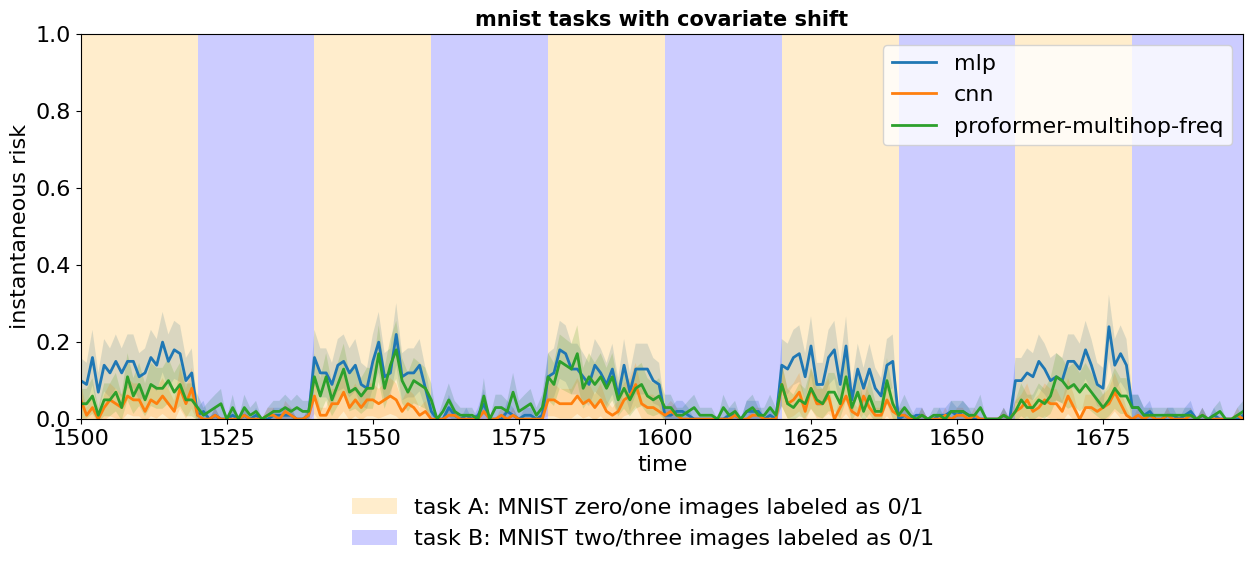

In [72]:
id = 5
title = 'mnist tasks with covariate shift'
paths = [
    f'experiments/vision/multirun/2024-05-08/mnist-mlp/6',
    f'experiments/vision/multirun/2024-05-06/mnist-cnn/6',
    f'experiments/vision/multirun/2024-05-07/mnist-proformer/4'
]
labels = [
    'mlp',
    'cnn',
    'proformer-multihop-freq'
]

risk = []
ci = []
for path in paths:
    with open(path + '/outputs.pkl', 'rb') as f:
        outputs = pickle.load(f)
        risk.append(outputs['inst_risk'])
        ci.append(outputs['ci'])
risk = np.array(risk)
ci = np.array(ci)


args = SetParams(outputs['args'])
task_labels = [
    'task A: MNIST zero/one images labeled as 0/1',
    'task B: MNIST two/three images labeled as 0/1'
]
plotting(risk, ci, labels, args, [1500, 1700], 'test', task_labels, title)

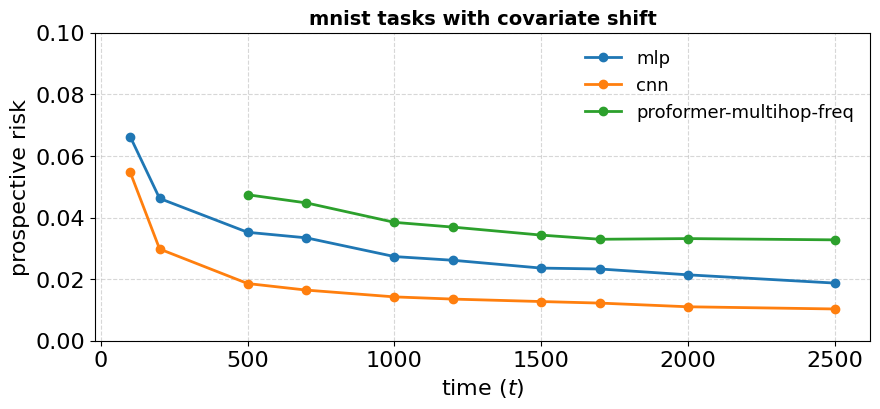

In [74]:
fig, ax = plt.subplots(figsize=(10, 4))

time_list = []
risk_list = []
for i in range(10):
    fname = f'experiments/vision/multirun/2024-05-08/17-28-41/{i}/outputs.pkl'
    with open(fname, 'rb') as f:
        outputs = pickle.load(f)
    time_list.append(outputs['args']['t'])
    risk_list.append(outputs['risk'])

ax.plot(time_list, risk_list, marker='o', lw=2, label='mlp')

time_list = []
risk_list = []
for i in range(10):
    fname = f'experiments/vision/multirun/2024-05-08/21-29-57/{i}/outputs.pkl'
    with open(fname, 'rb') as f:
        outputs = pickle.load(f)
    time_list.append(outputs['args']['t'])
    risk_list.append(outputs['risk'])

ax.plot(time_list, risk_list, marker='o', lw=2, label='cnn')

time_list = []
risk_list = []
for i in range(8):
    fname = f'experiments/vision/multirun/2024-05-08/21-48-42/{i}/outputs.pkl'
    with open(fname, 'rb') as f:
        outputs = pickle.load(f)
    time_list.append(outputs['args']['t'])
    risk_list.append(outputs['risk'])

ax.plot(time_list, risk_list, marker='o', lw=2, label='proformer-multihop-freq')

ax.set_xlabel(r"time ($t$)")
ax.set_ylabel(r"prospective risk")
ax.set_ylim([0, 0.1])
ax.legend(frameon=False, fontsize=13)
ax.grid(alpha=0.5, ls='--')
ax.set_title('mnist tasks with covariate shift', fontweight='bold', fontsize=14)
plt.show()

### Synthetic Tasks

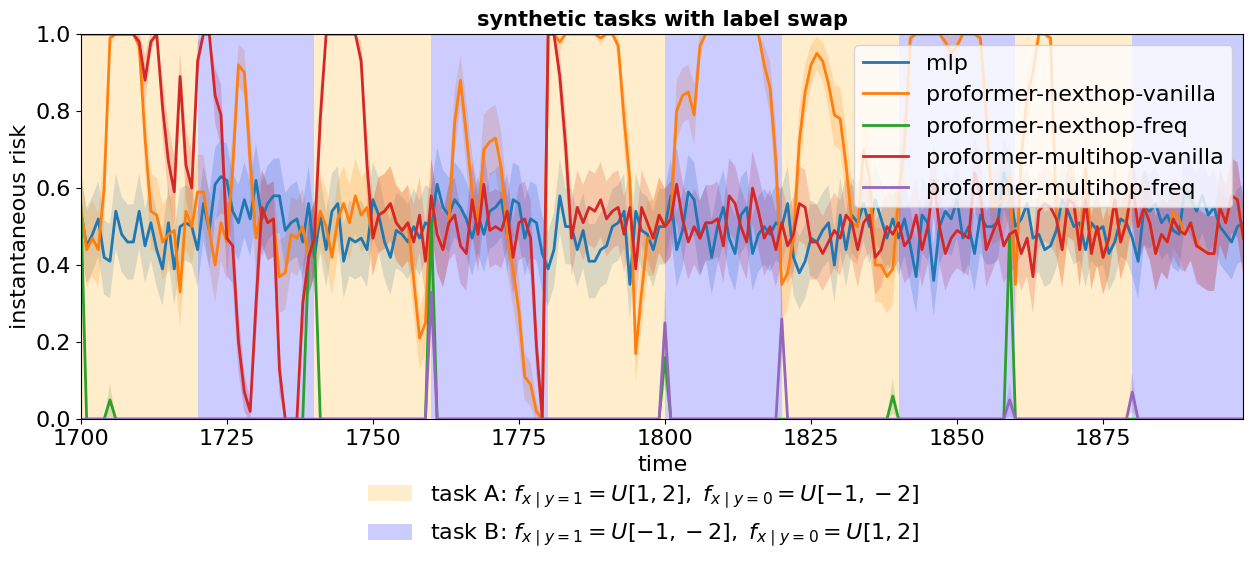

In [73]:
id = 5
title = 'synthetic tasks with label swap'
paths = [
    f'experiments/synthetic/multirun/2024-05-09/07-17-12/{id}',
    f'experiments/synthetic/multirun/2024-05-09/10-54-33/{id}',
    f'experiments/synthetic/multirun/2024-05-09/10-53-56/{id}',
    f'experiments/synthetic/multirun/2024-05-09/08-09-40/{id}',
    f'experiments/synthetic/multirun/2024-05-09/07-05-59/{id}'
]
labels = [
    'mlp',
    'proformer-nexthop-vanilla',
    'proformer-nexthop-freq',
    'proformer-multihop-vanilla',
    'proformer-multihop-freq'
]

risk = []
ci = []
for path in paths:
    with open(path + '/outputs.pkl', 'rb') as f:
        outputs = pickle.load(f)
        risk.append(outputs['inst_risk'])
        ci.append(outputs['ci'])
risk = np.array(risk)
ci = np.array(ci)

args = SetParams(outputs['args'])
task_labels = [
    r'task A: $f_{x \mid y = 1} = U[1, 2], \ f_{x \mid y = 0} = U[-1, -2]$',
    r'task B: $f_{x \mid y = 1} = U[-1, -2], \ f_{x \mid y = 0} = U[1, 2]$'
]
plotting(risk, ci, labels, args, [1700, 1900], 'test', task_labels, title)

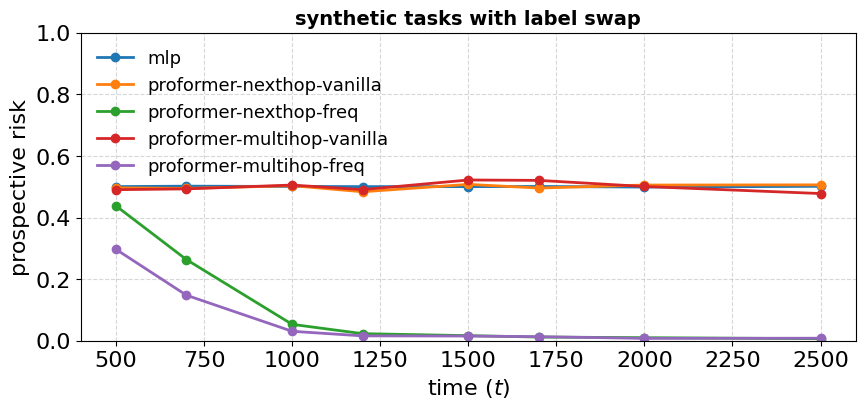

In [64]:
fig, ax = plt.subplots(figsize=(10, 4))

time_list = []
risk_list = []
for i in range(8):
    fname = f'experiments/synthetic/multirun/2024-05-09/07-17-12/{i}/outputs.pkl'
    with open(fname, 'rb') as f:
        outputs = pickle.load(f)
    time_list.append(outputs['args']['t'])
    risk_list.append(outputs['risk'])

ax.plot(time_list, risk_list, marker='o', lw=2, label='mlp')

time_list = []
risk_list = []
for i in range(8):
    fname = f'experiments/synthetic/multirun/2024-05-09/10-54-33/{i}/outputs.pkl'
    with open(fname, 'rb') as f:
        outputs = pickle.load(f)
    time_list.append(outputs['args']['t'])
    risk_list.append(outputs['risk'])

ax.plot(time_list, risk_list, marker='o', lw=2, label='proformer-nexthop-vanilla')

time_list = []
risk_list = []
for i in range(8):
    fname = f'experiments/synthetic/multirun/2024-05-09/10-53-56/{i}/outputs.pkl'
    with open(fname, 'rb') as f:
        outputs = pickle.load(f)
    time_list.append(outputs['args']['t'])
    risk_list.append(outputs['risk'])

ax.plot(time_list, risk_list, marker='o', lw=2, label='proformer-nexthop-freq')

time_list = []
risk_list = []
for i in range(8):
    fname = f'experiments/synthetic/multirun/2024-05-09/08-09-40/{i}/outputs.pkl'
    with open(fname, 'rb') as f:
        outputs = pickle.load(f)
    time_list.append(outputs['args']['t'])
    risk_list.append(outputs['risk'])

ax.plot(time_list, risk_list, marker='o', lw=2, label='proformer-multihop-vanilla')

time_list = []
risk_list = []
for i in range(8):
    fname = f'experiments/synthetic/multirun/2024-05-09/07-05-59/{i}/outputs.pkl'
    with open(fname, 'rb') as f:
        outputs = pickle.load(f)
    time_list.append(outputs['args']['t'])
    risk_list.append(outputs['risk'])

ax.plot(time_list, risk_list, marker='o', lw=2, label='proformer-multihop-freq')

ax.set_xlabel(r"time ($t$)")
ax.set_ylabel(r"prospective risk")
ax.set_ylim([0, 1])
ax.legend(frameon=False, fontsize=13)
ax.grid(alpha=0.5, ls='--')
ax.set_title('synthetic tasks with label swap', fontweight='bold', fontsize=14)
plt.show()